In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.style.use(['dark_background'])
mpl.rcParams["font.size"] = 14

In [2]:
from deepquantiles import presets, datasets

Using TensorFlow backend.


In [3]:
X, y = datasets.bishop_s(num=10000)

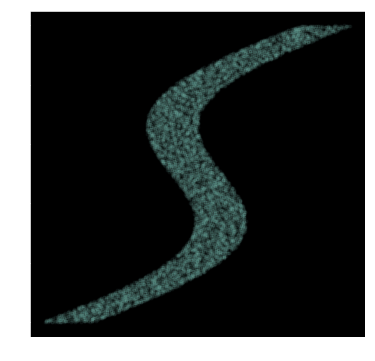

In [4]:
plt.figure(figsize=(6, 6))
plt.plot(X, y, '.', alpha=0.05)

In [21]:
models = [
    presets.mixture_model,
    presets.independent_quantile_model,
    presets.shared_quantile_model,
    presets.inverse_cdf_model,
]

names = [
    'GMDN',
    'indep. quantile networks',
    'shared quantile network',
    'inverse CDF network',
]

fit_kwargs = dict(
    epochs=100,
    batch_size=100,
    shuffle=True,
    verbose=0,
)

In [22]:
for model in models:
    %time model.fit(X, y, callbacks=presets.callbacks, **fit_kwargs)

CPU times: user 11 s, sys: 642 ms, total: 11.7 s
Wall time: 8.38 s
CPU times: user 1min 5s, sys: 7 s, total: 1min 12s
Wall time: 32.3 s
CPU times: user 50.1 s, sys: 4.81 s, total: 54.9 s
Wall time: 28 s
CPU times: user 1min 4s, sys: 8 s, total: 1min 12s
Wall time: 39 s


In [23]:
samples1 = []
for model in models:
    %time s = model.sample(X, num_samples=1)
    samples1.append(s)

CPU times: user 1.8 s, sys: 2.32 ms, total: 1.8 s
Wall time: 1.79 s
CPU times: user 1.97 s, sys: 0 ns, total: 1.97 s
Wall time: 1.93 s
CPU times: user 2.09 s, sys: 0 ns, total: 2.09 s
Wall time: 2.06 s
CPU times: user 3.64 s, sys: 271 ms, total: 3.92 s
Wall time: 1.47 s


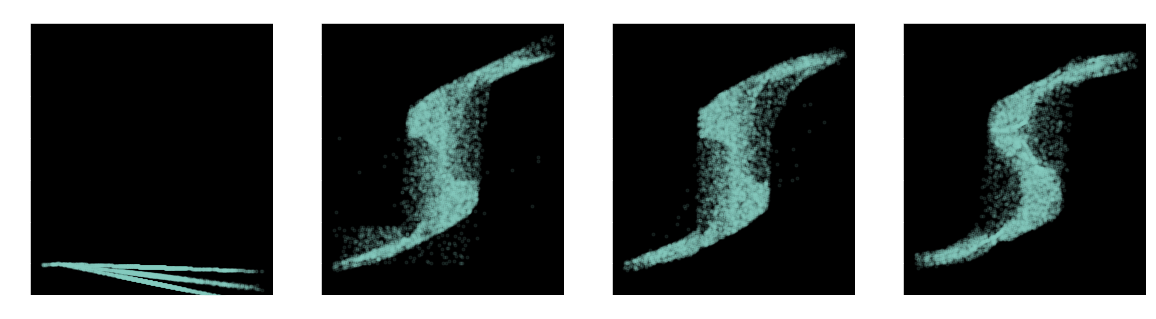

In [25]:
_, axes = plt.subplots(ncols=len(models), figsize=(5 * len(models), 5))
for i, model in enumerate(models):
    ax = axes[i]
    ax.plot(X, samples1[i], '.', alpha=0.1)
    ax.set_xlim([-0.15, 1.15])
    ax.set_ylim([-0.15, 1.15])
    ax.set_title(names[i])
# plt.savefig('comparison_failed_MDN_good_CDF.png')